In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
df.shape

(200, 4)

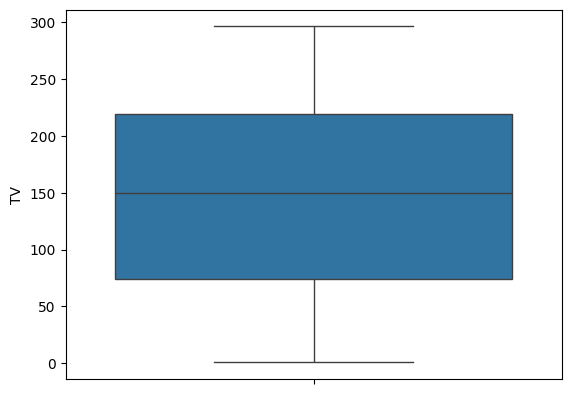

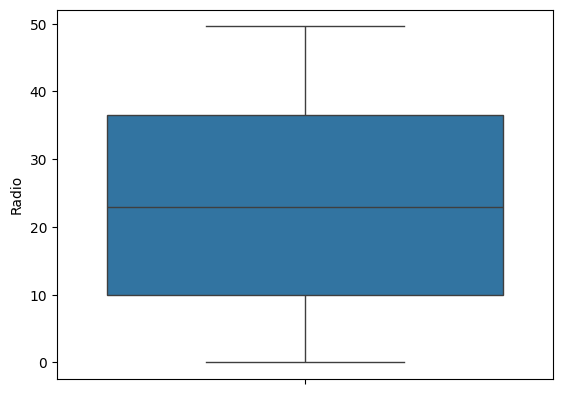

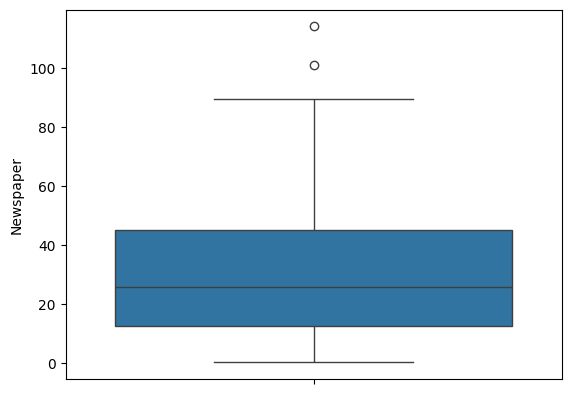

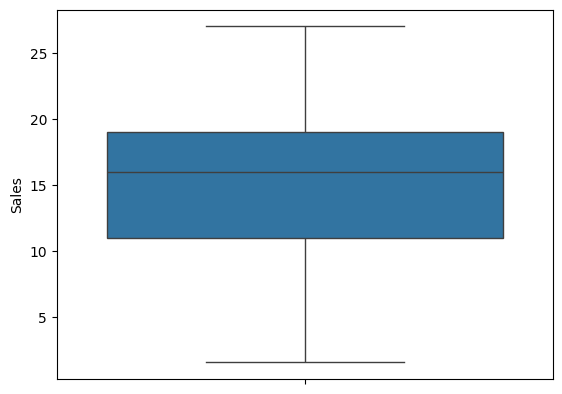

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [16]:
q1 = df['Newspaper'].quantile(0.25)

In [17]:
q3 = df['Newspaper'].quantile(0.75)

In [18]:
iqr = q3 - q1

In [19]:
up = (iqr*1.5)+ q3
lr = q1 - (iqr*1.5)

In [20]:
up , lr

(93.625, -35.775000000000006)

In [21]:
df= df[df['Newspaper']<= up]

<Axes: ylabel='Newspaper'>

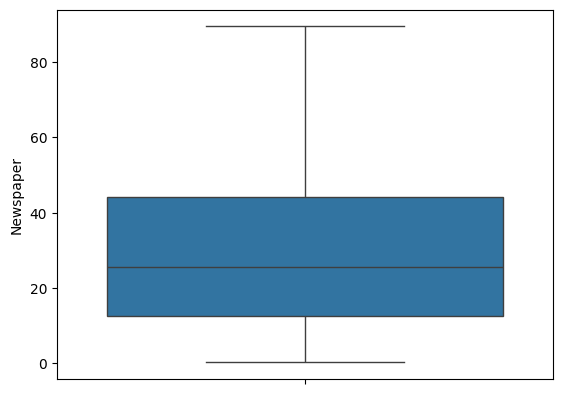

In [22]:
sns.boxplot(df['Newspaper'])

In [23]:
df.shape

(198, 4)

In [29]:
from sklearn.model_selection import train_test_split 
y = df['Sales']
x = df.drop('Sales' , axis = 1)
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.8, random_state = 0)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train , y_train)

LinearRegression()

In [33]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import mean_absolute_error , r2_score , accuracy_score

In [36]:
mean_absolute_error(y_test , y_pred)

1.1780466149681033

In [37]:
r2_score(y_test , y_pred)

0.9026978637834334